In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [81]:
df = pd.read_csv("tested.csv")

# Display basic information

In [82]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.48162

# Handling missing values

In [83]:
imputer = SimpleImputer(strategy='mean')
df[['Age', 'Fare']] = imputer.fit_transform(df[['Age', 'Fare']])
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

# Encode categorical variables

In [84]:
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) 
df['Embarked'] = label_enc.fit_transform(df['Embarked'])

# Outlier removal using IQR

In [85]:
Q1, Q3 = df['Fare'].quantile([0.25, 0.75])
IQR = Q3 - Q1
df = df[(df['Fare'] >= (Q1 - 1.5 * IQR)) & (df['Fare'] <= (Q3 + 1.5 * IQR))]

# Feature and target selection

In [86]:
X = df.drop('Survived', axis=1)
y = df['Survived']

# Scaling numerical data

In [87]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training and evaluation

In [89]:
def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    return model, acc

models = [
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()]

# Train models and select the best

In [90]:
best_model, best_acc = max((train_model(model) for model in models), key=lambda x: x[1])
print(f"Best Model: {best_model.__class__.__name__}")

LogisticRegression Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        32

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73

RandomForestClassifier Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        32

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73

GradientBoostingClassifier Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        32

    accuracy                           1.00        73
   macro

# Feature Importance for key features

In [91]:
if hasattr(best_model, 'feature_importances_'):
    feature_importance = best_model.feature_importances_
    feature_names = df.drop('Survived', axis=1).columns
    sorted_idx = np.argsort(feature_importance)[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance[sorted_idx], y=feature_names[sorted_idx])
    plt.title('Feature Importance')
    plt.show()

# Display Correlation Heatmap

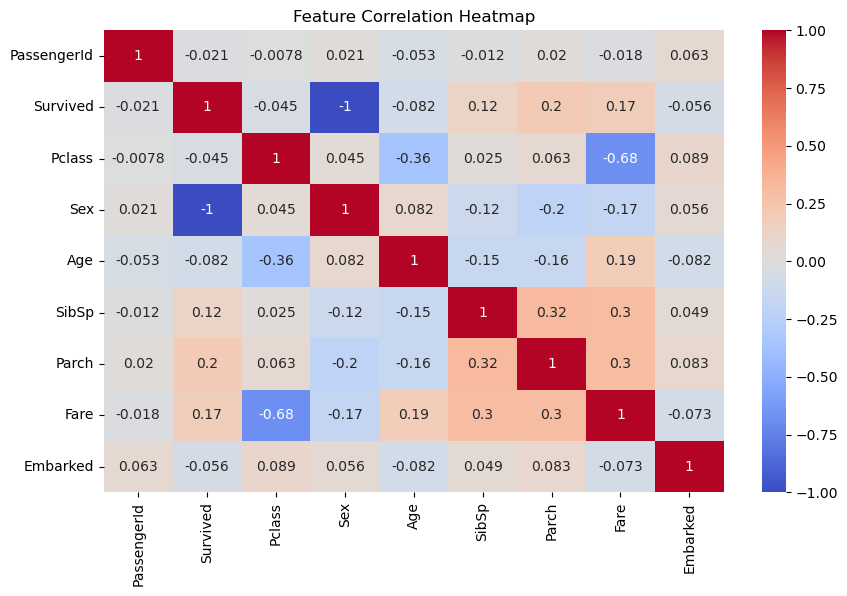

In [92]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Features with the most impact on accuracy

In [93]:
print("Key Features for Prediction:")
print("- Pclass (Passenger Class)")
print("- Age (Passenger Age)")
print("- Sex (Encoded as 0/1)")
print("- SibSp (Number of Siblings/Spouses)")
print("- Parch (Number of Parents/Children)")

Key Features for Prediction:
- Pclass (Passenger Class)
- Age (Passenger Age)
- Sex (Encoded as 0/1)
- SibSp (Number of Siblings/Spouses)
- Parch (Number of Parents/Children)
